In [145]:
import numpy as np
import pandas as pd
from darts.timeseries import TimeSeries
from darts.models import LightGBMModel, LinearRegressionModel, RandomForest
from darts.dataprocessing.transformers import Scaler
from copy import deepcopy

In [146]:
raw_data = pd.read_csv('./processed_data/processed_data.csv', parse_dates=['date'])

In [147]:
value_cols = ['T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4', 'RH_4', 'T5',
              'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9', 'RH_9', 'T_out',
              'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility', 'Tdewpoint', 'rv2',
              'total_load']
time_col = 'date'

In [148]:
ts_data = TimeSeries.from_dataframe(raw_data, time_col=time_col, value_cols=value_cols)

In [149]:
ts_data = ts_data.add_holidays('US')
ts_data = ts_data.add_datetime_attribute('month', cyclic=True)
ts_data = ts_data.add_datetime_attribute('dayofweek', one_hot=True)
ts_data = ts_data.add_datetime_attribute('hour', cyclic=True)
ts_data = ts_data.add_datetime_attribute('dayofyear', cyclic=True)

In [150]:
cov_cols = list(ts_data.columns)

In [151]:
ts_data.columns

Index(['T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4', 'RH_4', 'T5', 'RH_5',
       'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9', 'RH_9', 'T_out',
       'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility', 'Tdewpoint', 'rv2',
       'total_load', 'holidays', 'month_sin', 'month_cos', 'dayofweek_1',
       'dayofweek_2', 'dayofweek_3', 'dayofweek_4', 'dayofweek_5',
       'dayofweek_6', 'dayofweek_7', 'hour_sin', 'hour_cos', 'dayofyear_sin',
       'dayofyear_cos'],
      dtype='object', name='component')

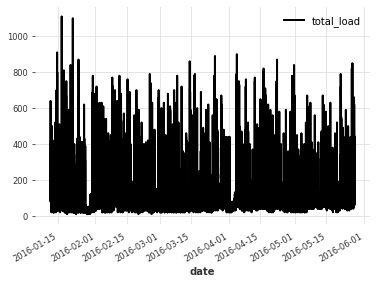

In [152]:
ts_data['total_load'].plot()

In [153]:
train, test = ts_data.split_after(0.8)

In [132]:
train_target = train['total_load']
train_cov = train[cov_cols]

In [133]:
test_target = test['total_load']
test_cov = test[cov_cols]

In [162]:
l_model = RandomForest(
    lags=5,
    lags_past_covariates=5
)

In [163]:
l_model.fit(train_target, past_covariates=train_cov.append(test_cov))

In [164]:
from darts.metrics.metrics import r2_score, coefficient_of_variation

In [165]:
pred = l_model.predict(n=2500, past_covariates=train_cov.append(test_cov))

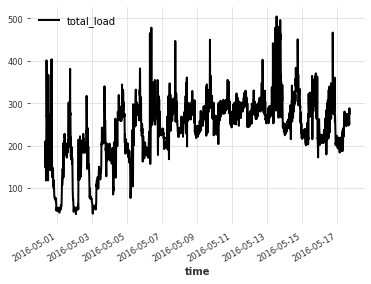

In [166]:
pred.plot()

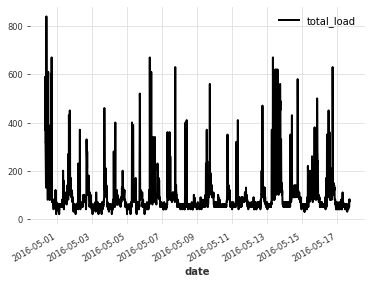

In [167]:
test_target[0:2500].plot()

In [89]:
from darts.metrics.metrics import r2_score
r2_score(test_target[0:3000], pred)

-2.7224886812482807